<a href="https://colab.research.google.com/github/Sindhuhar/math-for-machine-learning/blob/main/Regression_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression in PyTorch**

In [35]:
import torch
import matplotlib.pyplot as plt

In [36]:
x = torch.tensor([0,1,2,3,4,5,6,7.])  # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

The y
 values were created using the equation of a line y=mx+b
. This way, we know what the model parameters to be learned are, say, m=-0.5
 and b=2
. Random, normally-distributed noise has been added to simulate sampling error:

In [37]:
# y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)

For reproducibility of this demo, here's a fixed example of y
 values obtained by running the commented-out line above:

In [38]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # E.g.: Patient's "forgetfulness score"
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

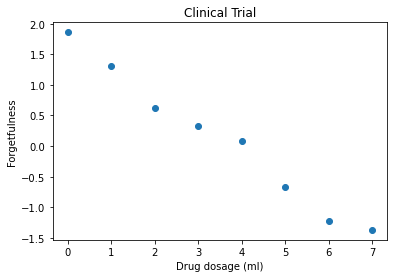

In [39]:
fig, ax = plt.subplots()
plt.title('Clinical Trial')
plt.xlabel('Drug dosage (ml)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x,y)

Initialize the slope parameter m
 with a "random" value of 0.9...

(N.B.: In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)

In [40]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [41]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [42]:
def regression(my_x, my_m,my_b):
  return my_m*my_x + my_b

In [43]:
def regression_plot(my_x,my_y,my_m,my_b):

  fig, ax = plt.subplots()

  ax.scatter(my_x,my_y)

  x_min, x_max = ax.get_xlim()
  y_min = regression(x_min, my_m, my_b).detach().item()
  y_max = regression(x_max, my_m, my_b).detach().item()

  ax.set_xlim([x_min, x_max])
  _ = ax.plot([x_min,x_max],[y_min,y_max])

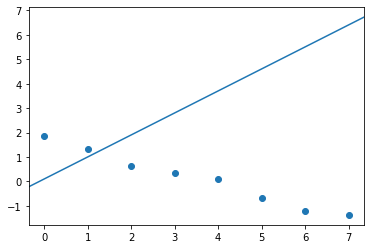

In [44]:
regression_plot(x,y,m,b)

**Machine Learning**

In four easy steps :)

**Step 1**: Forward pass

In [45]:
yhat = regression(x,m,b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

Step 2: Compare ŷ 
 with true y
 to calculate cost C

In [60]:
def mse(my_yhat,my_y):
  sigma = torch.sum((my_yhat - my_y)**2)
  return (sigma/len(my_y))

In [61]:
C = mse(yhat,y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of C
 w.r.t. parameters

In [48]:
C.backward()

In [49]:
m.grad

tensor([36.3050])

**Step 4**: Gradient descent

In [50]:
optimizer = torch.optim.SGD([m,b],lr=0.01)

In [51]:
optimizer.step()

Confirm parameters have been adjusted sensibly:

In [52]:
m

tensor([0.5369], requires_grad=True)

In [53]:
b

tensor([0.0374], requires_grad=True)

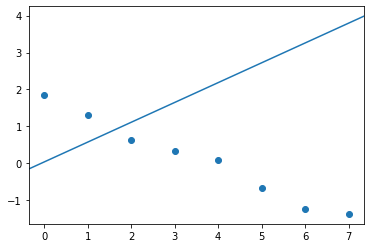

In [57]:
regression_plot(x,y,m,b)

In [62]:
C = mse(regression(x, m, b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

Put the 4 steps in a loop to iteratively minimize cost toward zero:

In [64]:
epochs = 1000
for epoch in range (epochs):
  optimizer.zero_grad()
  
  yhat = regression(x,m,b) #step 1
  C = mse(yhat,y) #step 2
  C.backward() #step 3
  optimizer.step() #step 4

  print ('Epoch {}, Cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(),'%.3g' % m.grad.item(),'%.3g'% b.grad.item()))

Epoch 0, Cost 0.0195, m grad 0.000668, b grad -0.00329
Epoch 1, Cost 0.0195, m grad 0.000665, b grad -0.00327
Epoch 2, Cost 0.0195, m grad 0.000661, b grad -0.00325
Epoch 3, Cost 0.0195, m grad 0.000658, b grad -0.00323
Epoch 4, Cost 0.0195, m grad 0.000653, b grad -0.00321
Epoch 5, Cost 0.0195, m grad 0.00065, b grad -0.00319
Epoch 6, Cost 0.0195, m grad 0.000646, b grad -0.00318
Epoch 7, Cost 0.0195, m grad 0.000642, b grad -0.00316
Epoch 8, Cost 0.0195, m grad 0.000639, b grad -0.00314
Epoch 9, Cost 0.0195, m grad 0.000635, b grad -0.00312
Epoch 10, Cost 0.0195, m grad 0.000631, b grad -0.0031
Epoch 11, Cost 0.0195, m grad 0.000628, b grad -0.00309
Epoch 12, Cost 0.0195, m grad 0.000623, b grad -0.00307
Epoch 13, Cost 0.0195, m grad 0.00062, b grad -0.00305
Epoch 14, Cost 0.0195, m grad 0.000616, b grad -0.00303
Epoch 15, Cost 0.0195, m grad 0.000612, b grad -0.00302
Epoch 16, Cost 0.0195, m grad 0.00061, b grad -0.003
Epoch 17, Cost 0.0195, m grad 0.000605, b grad -0.00298
Epoch 18

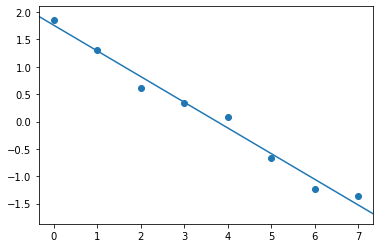

In [65]:
regression_plot(x,y,m,b)

In [66]:
m.item()

-0.4692818224430084

In [67]:
b.item

<function Tensor.item>